In [1]:
import networkx as nx
import numpy as np #array manp.
import pandas as pd #DFs
import matplotlib.pyplot as plt #Plot
from IPython.display import display, HTML #Pretty print
#https://datacatalog.worldbank.org/international-tourism-number-departures
#https://www.kaggle.com/aknyldrn1/tourists-by-nationalities-in-turkey

In [2]:
df_Turkey = pd.read_excel("resources/Turkey_tourism.xlsx")

print("Before Cleaing")
display(df_Turkey)

df_Turkey.replace(to_replace = r"-.*", value = "", regex = True, inplace = True) #cleaing text
df_Turkey["DATE"] = pd.to_numeric(df_Turkey["DATE"])# string to int
df_Turkey= df_Turkey.groupby(by = ['DATE']).sum() #result by year
df_Turkey.columns = list(pd.Series(df_Turkey.columns).str.title()) #CHANGING COLS NAMES FOR EASIER COMPARISON WITH OTHER DFs
df_Turkey.drop(index = [2020], inplace = True)
df_Turkey = df_Turkey / 1000

print("After Cleaning")
display(df_Turkey)

Before Cleaing


,DATE,GERMANY,ALBANIA,AUSTRIA,BELGIUM,BOSNIA AND HERZEGOVINA,BULGARIA,CZECH REPUCLIC,DENMARK,ESTONIA,...,PAKISTAN,SINGAPORE,SYRIA,SAUDI ARABIA,THAILAND,JORDAN,YEMEN,AUSTRALIA,NEW ZEALAND,HAYMATLOS
0,2008-04,242531,3219,22668,30772,3539,110627,4198,10878,1098,...,1746,1302,27704.0,2074,1081,3455,331,10084,2249,70
1,2008-05,399724,4156,32265,50483,4709,148642,9286,26008,4508,...,2659,1693,30869.0,2025,1005,4336,444,13011,2606,11
2,2008-06,364145,4862,44762,54415,6093,142896,22824,29591,4649,...,3196,2200,32572.0,2758,779,7329,426,13024,2687,11
3,2008-07,519849,9718,69174,102714,8854,149194,30617,62271,5602,...,3279,1167,43426.0,9587,773,15335,635,15074,3337,17
4,2008-08,728774,12534,145205,130769,9554,151924,29955,54233,4944,...,4026,846,52328.0,24972,954,16285,1005,17875,2842,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2020-06,16837,950,1961,1994,1181,20109,218,531,30,...,375,25,710.0,89,7,924,25,218,36,2
147,2020-07,94960,3680,6757,9343,5335,42525,647,3588,116,...,1170,72,2697.0,69,205,1215,211,291,73,3
148,2020-08,228601,6177,26856,39456,10774,72845,1375,5365,352,...,2821,82,5584.0,350,168,2943,606,621,239,14
149,2020-09,166164,5368,14655,12872,10472,232094,1582,3837,416,...,5718,114,6845.0,688,271,6367,719,1011,406,14


After Cleaning


,Germany,Albania,Austria,Belgium,Bosnia And Herzegovina,Bulgaria,Czech Repuclic,Denmark,Estonia,Finland,...,Pakistan,Singapore,Syria,Saudi Arabia,Thailand,Jordan,Yemen,Australia,New Zealand,Haymatlos
DATE,,,,,,,,,,,,,,,,,,,,,
2008,3826.252,54.904,445.704,533.885,52.192,1227.611,152.812,255.632,32.050,94.848,...,25.516,16.381,321.71500,51.990,8.013,64.644,4.212,114.885,22.089,0.242
2009,4481.571,61.247,537.721,592.651,54.137,1623.640,166.505,296.108,36.845,138.159,...,25.058,20.070,501.01600,66.324,9.964,87.844,6.244,132.472,24.160,0.209
2010,4370.248,50.163,497.931,544.728,47.219,1448.923,174.508,314.369,35.136,143.328,...,23.389,18.921,891.19200,84.915,9.259,96.406,6.199,132.174,24.643,2.812
2011,4815.156,53.286,530.800,594.679,54.998,1399.434,222.228,371.195,34.809,187.079,...,28.880,20.745,965.57900,116.977,11.081,94.370,7.257,152.313,26.762,0.474
2012,5025.660,59.372,504.026,612.807,61.644,1498.461,223.654,391.467,35.419,195.490,...,29.391,22.162,333.72800,174.786,11.705,101.553,11.233,165.579,28.271,3.022
2013,5048.199,64.175,515.224,654.757,72.471,1582.896,217.428,403.633,48.514,219.564,...,34.296,22.264,234.04599,231.603,20.421,102.269,16.464,190.635,30.669,0.446
2014,5251.870,75.549,507.835,662.249,83.628,1695.504,226.193,408.744,55.491,228.610,...,50.716,29.051,311.44200,341.540,24.413,130.516,24.926,200.898,33.037,0.639
2015,5593.065,79.771,486.308,619.059,86.449,1826.177,212.688,411.284,63.348,215.170,...,62.840,26.571,375.46500,451.216,24.161,160.462,22.405,226.630,37.011,0.360
2016,3928.954,82.679,313.960,415.172,66.707,1696.645,87.891,332.275,35.784,122.786,...,54.250,16.049,196.71100,534.086,11.885,202.776,24.403,98.919,15.457,0.572


In [3]:
df_INT = pd.read_csv("resources/INT_tourism.csv", skiprows = 4)
print("Before Cleaing")
display(df_INT)

#dropping non-necessary cols
df_INT.drop(columns = [str(num) for num in range(1960,2008)] + ['Country Code','Indicator Name', 'Indicator Code', 'Unnamed: 65', '2020'], axis = 1, inplace = True)
df_INT['Country Name'] = df_INT['Country Name'].str.title()#CHANGING COLS NAMES FOR EASIER COMPARISON WITH OTHER DFs
#Melting DF(UNPIVOTING DF, KEEPING THE ID_VARS COLS AND CHANGING THE OTHERS COLS TO VALUES WITH RESPECT TO ID_VARS
df_INT = df_INT.melt(id_vars=['Country Name'], var_name="Year", value_name= "No")
df_INT.set_index(keys = "Year", inplace = True)
#Pivoting DF (converting country name from values to Cols)
df_INT = df_INT.pivot( columns='Country Name', values = "No") 
df_INT.index = pd.to_numeric(df_INT.index)
df_INT.dropna(axis = 1, thresh = len(df_INT.index) - 2 , inplace = True)
df_INT = df_INT / 1000

print("After Cleaing")
display(df_INT)

Before Cleaing


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,3959000.0,3928000.0,4146000.0,4504000.0,4852000.0,5186000.0,5415000.0,5922000.0,NaN,NaN
4,Andorra,AND,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,"International tourism, number of departures",ST.INT.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After Cleaing


Country Name,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Belarus,Belgium,Bolivia,...,Ukraine,United Kingdom,United States,Upper Middle Income,Uruguay,Uzbekistan,Vanuatu,"Venezuela, Rb",World,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2008,3716.0,1539.0,5425.0,516.0,5808.0,9677.0,2162.0,6323.0,8887.0,589.0,...,16100.0,69011.0,136148.0,275845.473685,734.0,1150.0,19.0,1745.0,1.397713e+06,593.0
2009,3404.0,1677.0,5793.0,526.0,6276.0,10121.0,2363.0,6440.0,8775.0,518.0,...,15961.0,63513.0,129954.0,266213.756478,826.0,1317.0,20.0,1651.0,1.344114e+06,631.0
2010,3443.0,1757.0,6083.0,563.0,7103.0,9882.0,3176.0,7464.0,8801.0,604.0,...,17741.0,64647.0,121574.0,283418.169535,1027.0,1610.0,21.0,1477.0,1.416355e+06,650.0
2011,4120.0,1715.0,7676.0,715.0,7788.0,9874.0,3550.0,7542.0,9727.0,775.0,...,20335.0,67493.0,114089.0,306093.605809,1534.0,NaN,22.0,1719.0,1.468887e+06,693.0
2012,3959.0,1911.0,8295.0,965.0,8212.0,10960.0,3874.0,8427.0,9576.0,788.0,...,21755.0,66858.0,116329.0,330100.304557,1816.0,NaN,23.0,1734.0,1.527839e+06,720.0
2013,3928.0,2136.0,9844.0,1083.0,9052.0,10671.0,4285.0,8841.0,10803.0,837.0,...,23988.0,68959.0,118968.0,366983.307239,2281.0,3117.0,26.0,1931.0,1.603962e+06,2946.0
2014,4146.0,2839.0,10022.0,1198.0,9480.0,10994.0,4244.0,7236.0,10991.0,932.0,...,22637.0,72204.0,121699.0,379772.578349,2396.0,2786.0,26.0,1589.0,1.614143e+06,3182.0
2015,4504.0,3638.0,13159.0,1187.0,9810.0,10628.0,4096.0,6972.0,10835.0,965.0,...,23336.0,77619.0,130364.0,390556.949148,2217.0,3491.0,27.0,1539.0,1.685022e+06,3393.0
2016,4852.0,4530.0,18645.0,1263.0,10390.0,11534.0,4282.0,8340.0,13372.0,940.0,...,25226.0,81757.0,141526.0,409387.041831,1715.0,3848.0,25.0,1530.0,1.767080e+06,3192.0


In [4]:
#Finding mutual countries between the 2 tables
x = [country in df_INT.columns  for country in df_Turkey.columns]
y = np.array(df_Turkey.columns)

avl_countries= y[x]
df_Turkey =  df_Turkey[avl_countries]
df_INT = df_INT[avl_countries]
#Choosing the year for the ploting
wanted_year = 2016

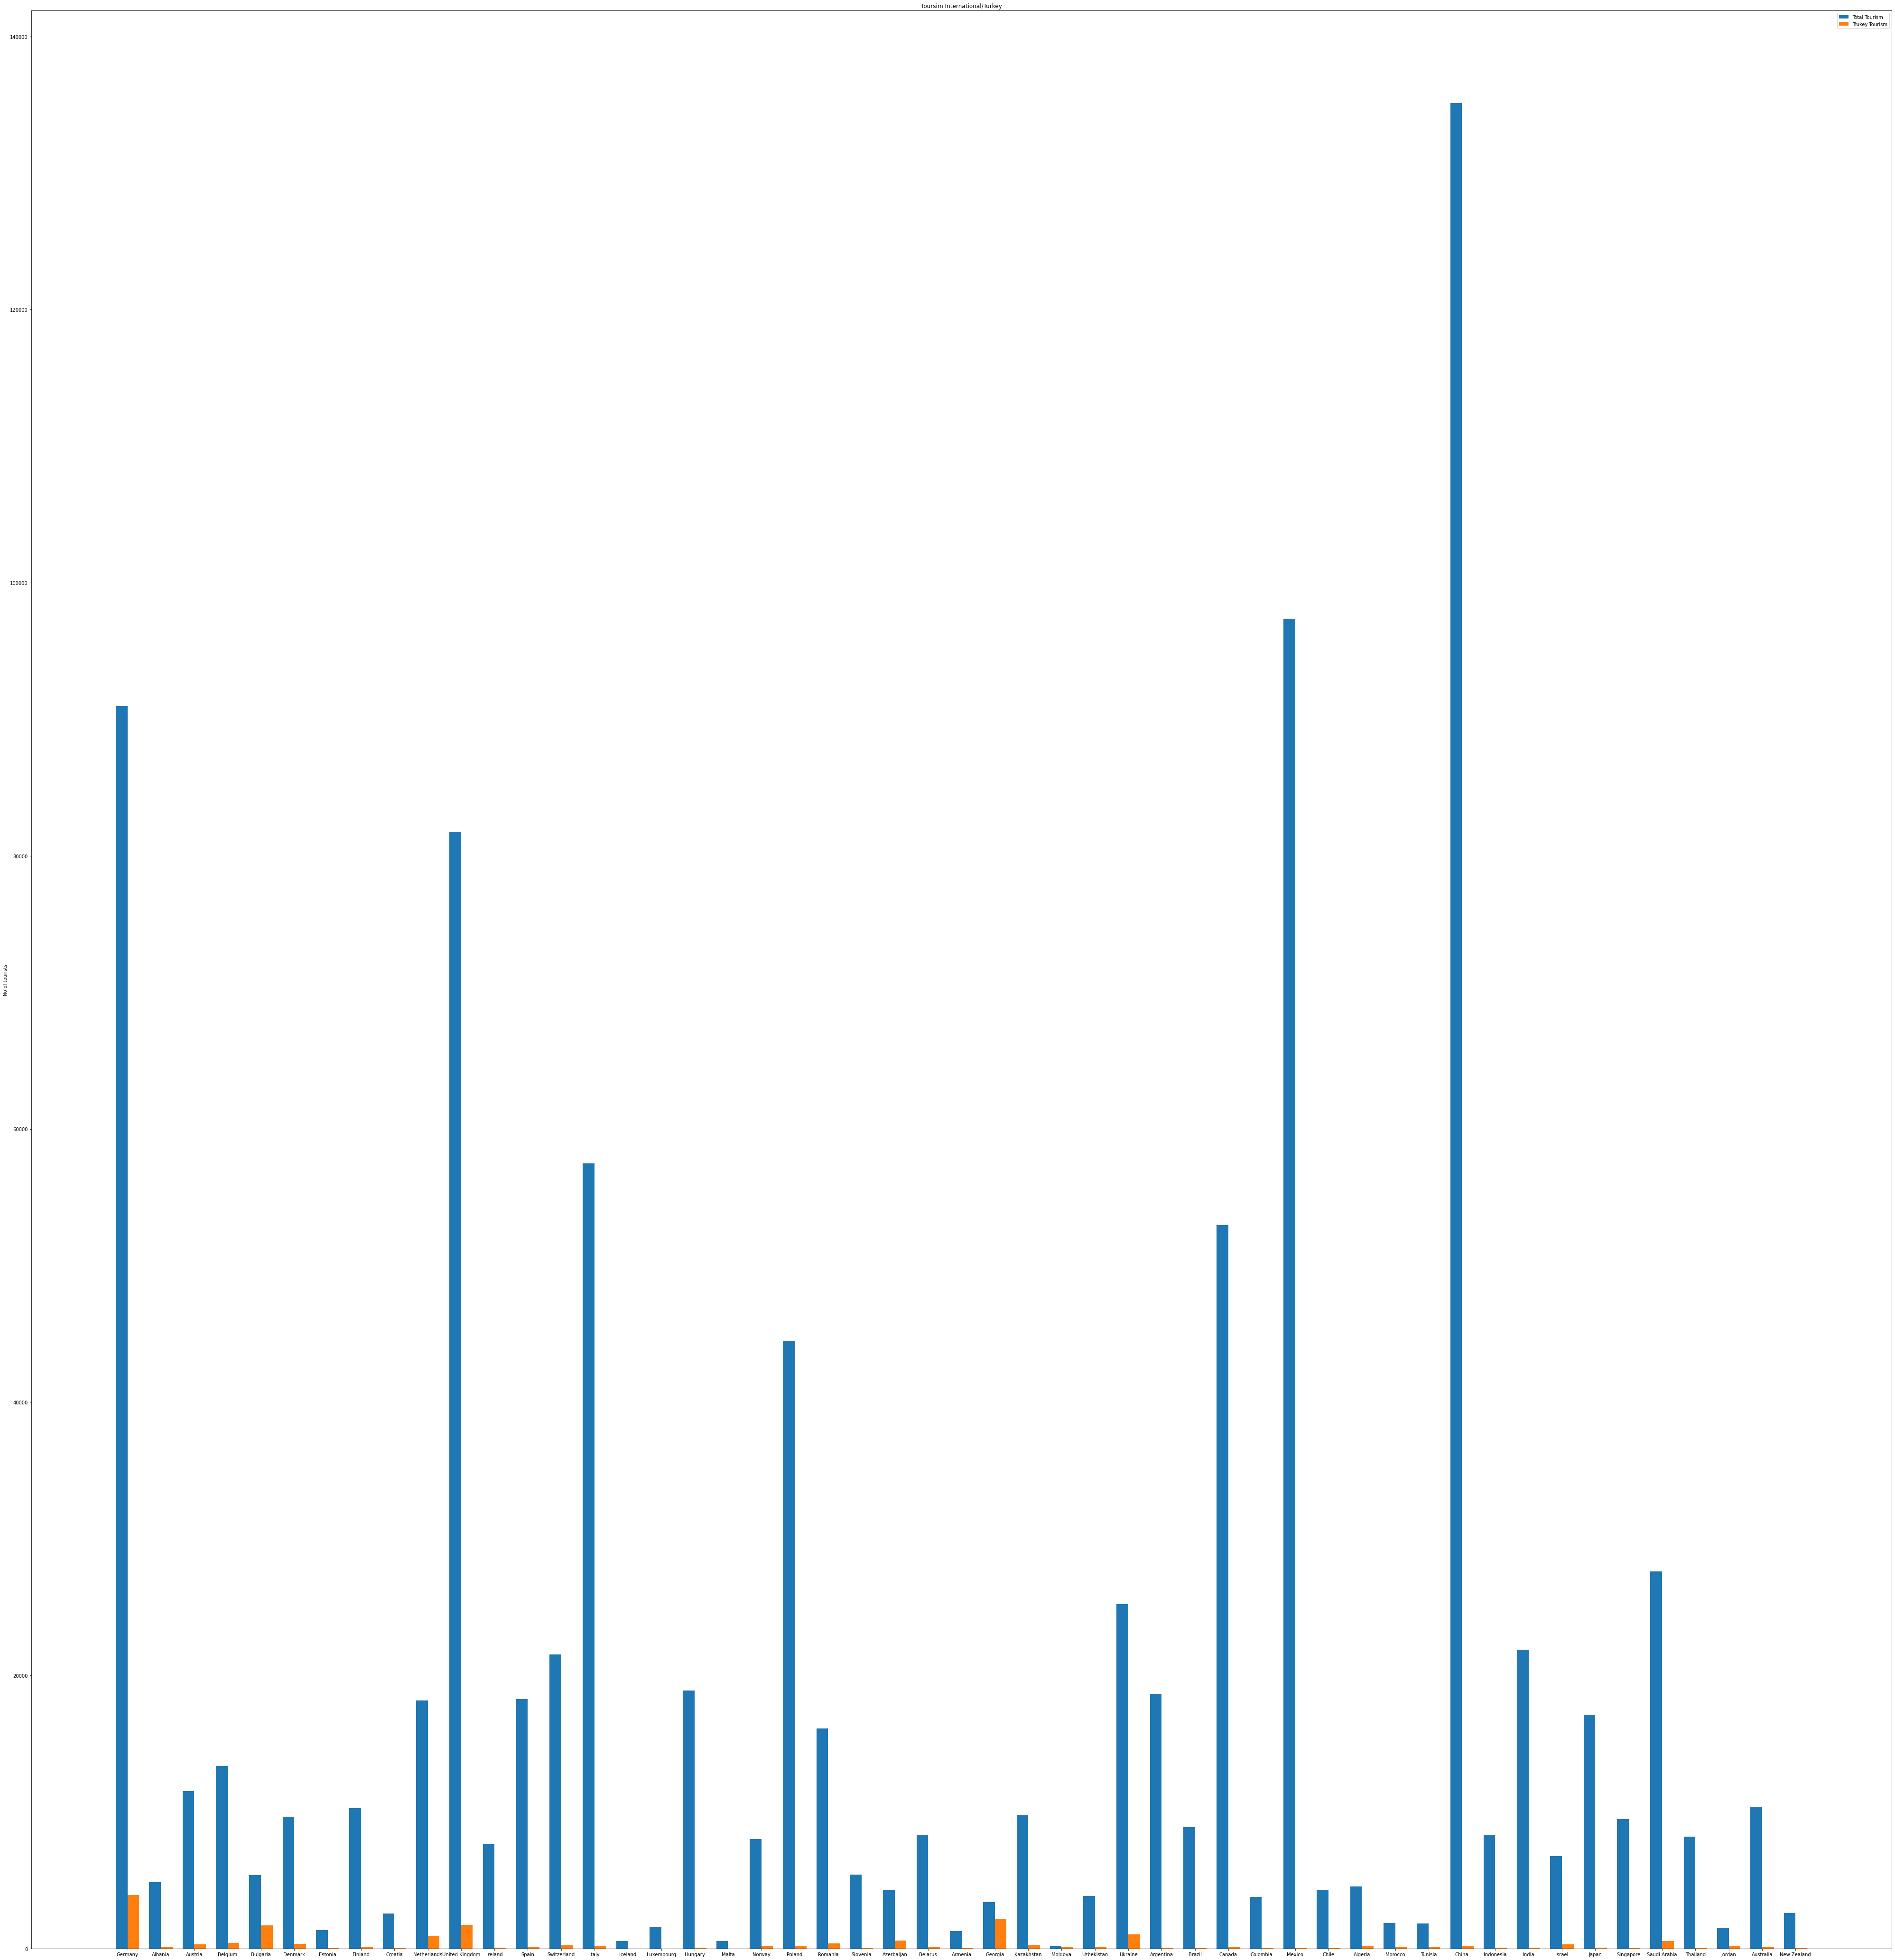

In [5]:
labels = avl_countries
INT_tourism = df_INT.loc[wanted_year]
TR_tourism = df_Turkey.loc[wanted_year]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, INT_tourism, width, label='Total Tourism')
ax.bar(x + width/2, TR_tourism, width, label='Trukey Tourism')

ax.set_ylabel('No of tourists')
ax.set_title('Toursim International/Turkey')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
fig.set_size_inches(70, 70)
fig.patch.set_facecolor('white')
plt.show()

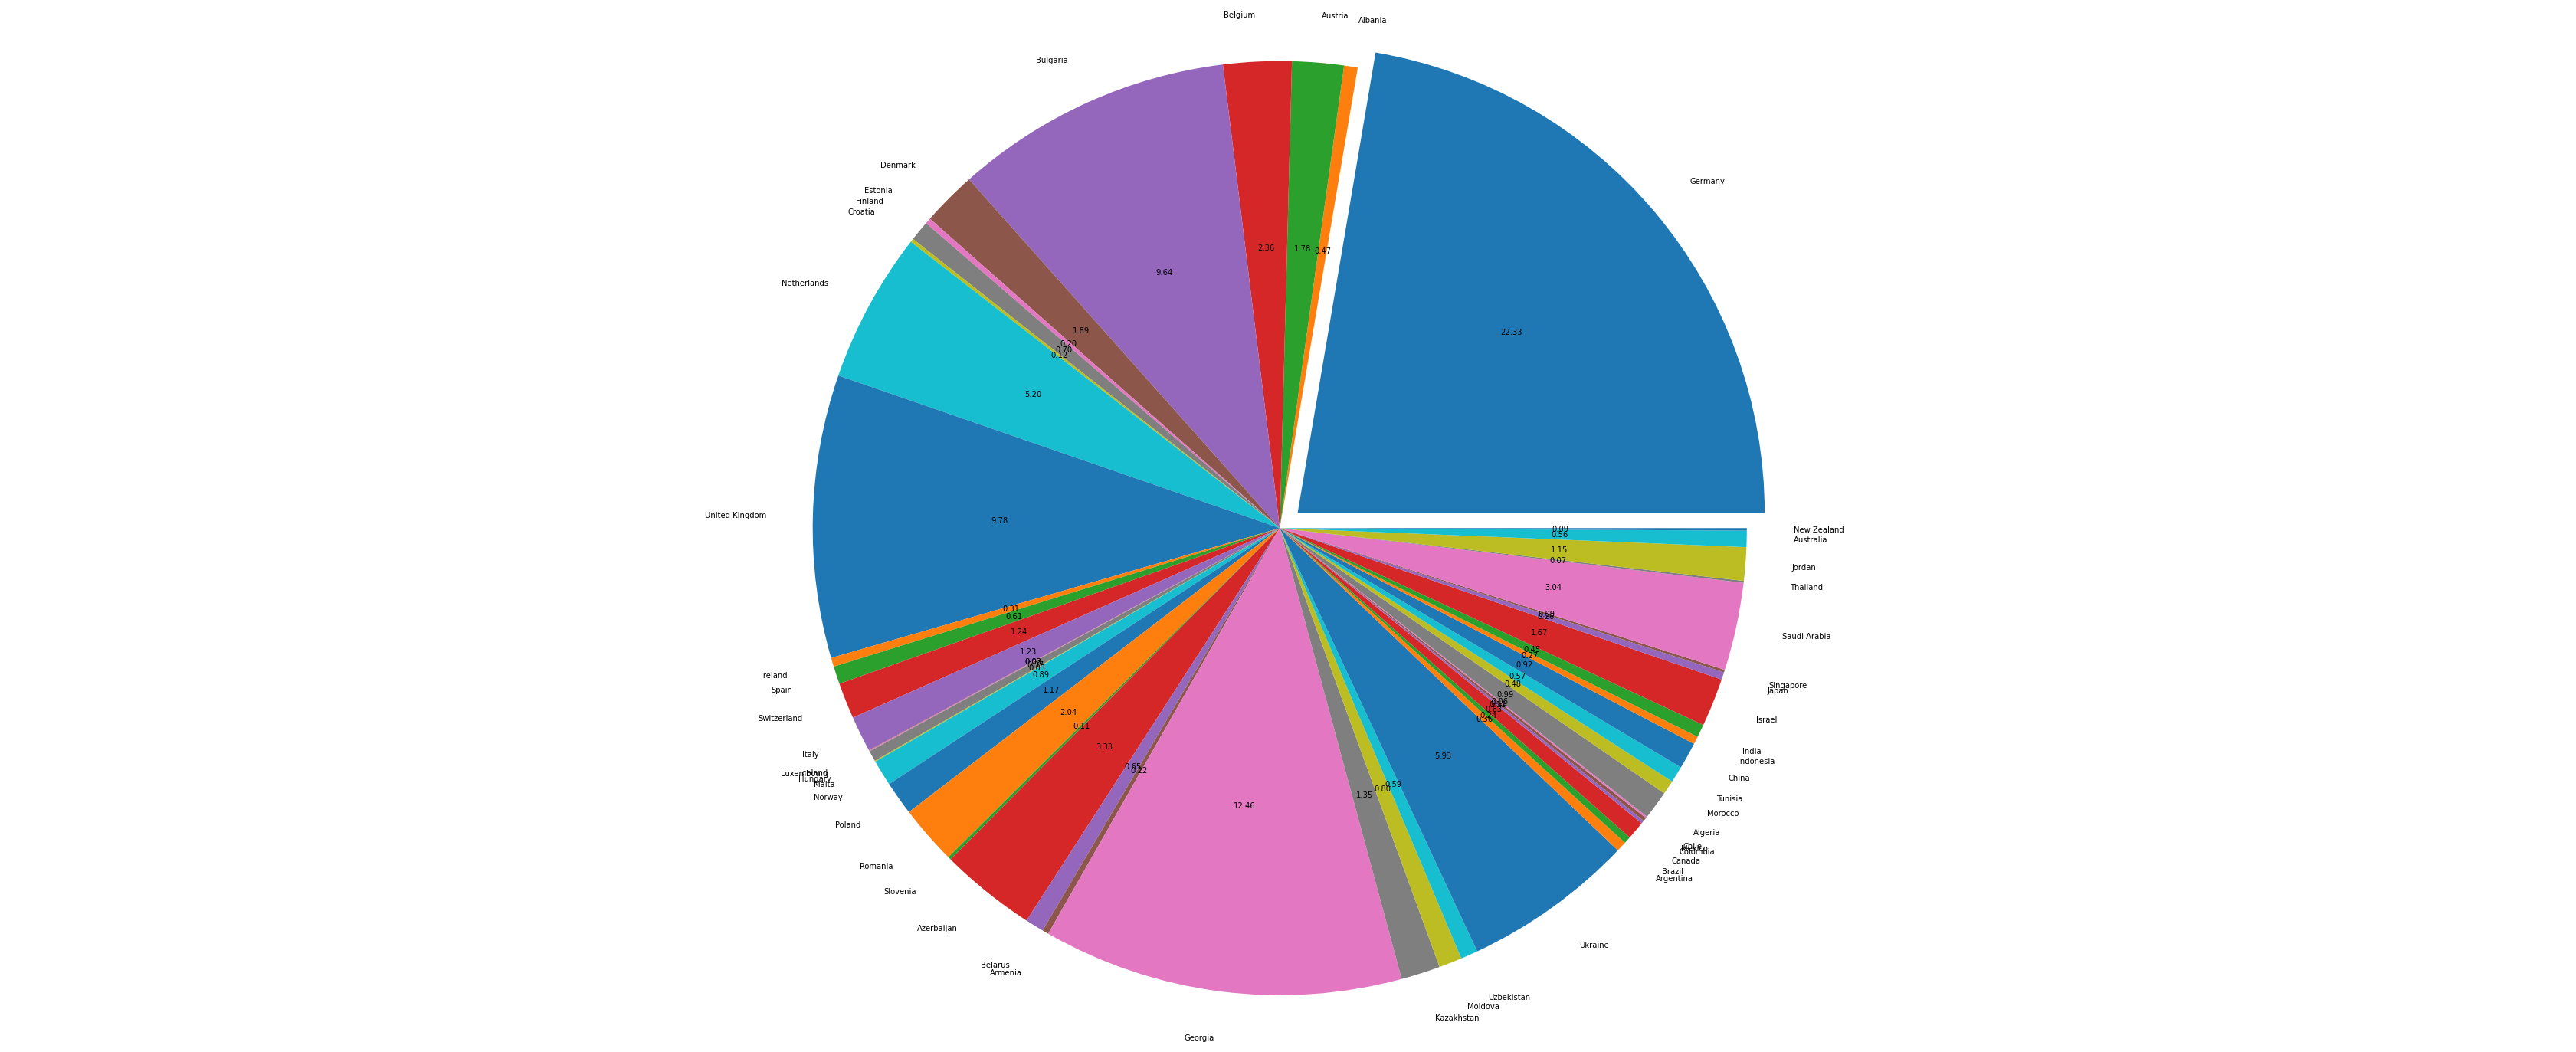

In [6]:
labels = avl_countries
TR_tourism = df_Turkey.loc[wanted_year]

labels = avl_countries
sizes = df_Turkey.loc[wanted_year]

explode = []
for c in df_Turkey.columns:
    if df_Turkey.loc[wanted_year].idxmax() == c: 
        explode.append(0.05)        
    else: explode.append(0)
explode = tuple(explode)


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,  explode = explode, autopct='%.2f')
ax1.axis('equal') 
fig1.patch.set_facecolor('white')
fig1.set_size_inches(60, 25)
plt.show()

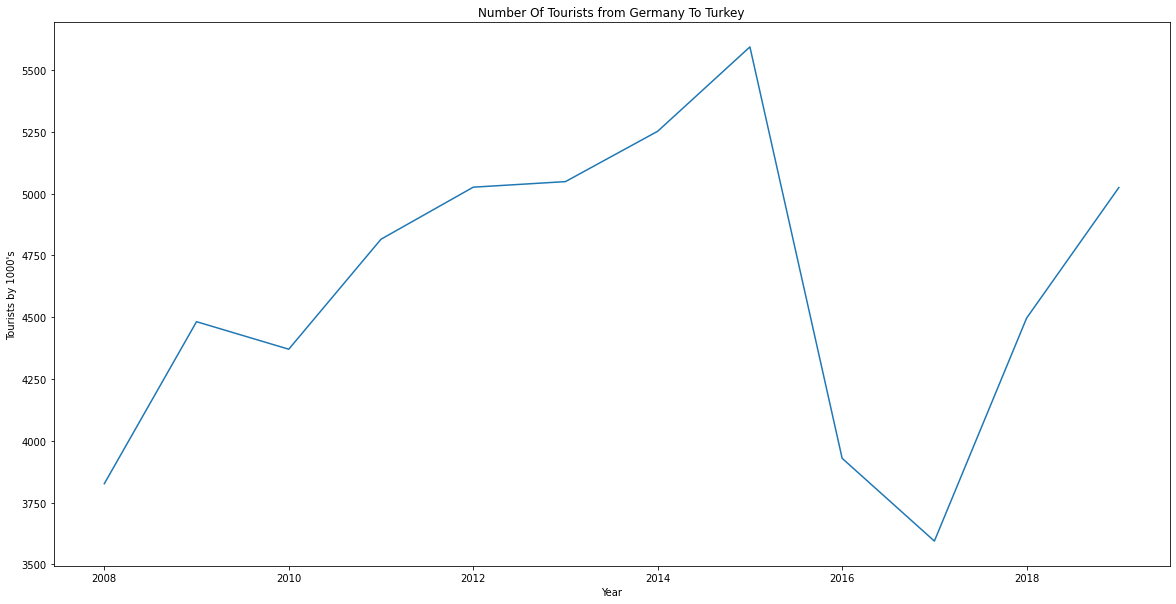

In [7]:
def CountryTouristChart(wanted_Country):
    x = list(df_Turkey.index)
    y = list(df_Turkey[wanted_Country])
    fig2, ax2 = plt.subplots()
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Tourists by 1000\'s')
    ax2.set_title("Number Of Tourists from %s To Turkey"%wanted_Country)
    fig2.patch.set_facecolor('white')
    fig2.set_size_inches(20, 10)

    plt.plot(x,y)
    plt.show()
    
CountryTouristChart("Germany")   